In [1]:
import os
import sys
import glob
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
from numpy.random import seed
seed(1)

### Read and build the Dataset

In [12]:
array_tau = np.load('ntuples/dataset_tau.npy')
array_qcd = np.load('ntuples/dataset_fake_tau.npy')
print(array_tau.shape)
print(array_qcd.shape)

(4922172, 10, 5)
(2081154, 10, 5)


In [13]:
train = {}
test = {}

test_percentage = 18#%
test_len = math.floor(len(array_tau)*test_percentage/100)
coordinates = []
[coordinates.append([True, True, False, False, False]) for i in range( 10 ) ]
coordinates = np.reshape(np.array(coordinates), ( 10, 5) )

test_len = 15000
test['features'] = array_tau[:test_len]
test['features'] = np.append(test['features'], array_qcd[:test_len], axis = 0)
test['points'] = np.reshape( test['features'][:,coordinates], ( len(test['features']), 10, 2) )
test['label'] = np.ones(test_len)
test['label'] = np.append(test['label'],np.zeros(test_len), axis = 0)

train_len = 50000
train['features'] = array_tau[test_len:train_len+test_len]
train['features'] = np.append(train['features'], array_qcd[test_len:train_len+test_len], axis = 0)
train['points'] = np.reshape( train['features'][:,coordinates], ( len(train['features']), 10, 2) )
train['label'] = np.ones( train_len )
train['label'] = np.append(train['label'], np.zeros(train_len), axis = 0)
print(train['label'][49999])

1.0


In [14]:
print(train['points'].shape)
print(test['points'].shape)
print(train['features'].shape)
print(test['features'].shape)
print(train['label'].shape)
print(test['label'].shape)

(100000, 10, 2)
(30000, 10, 2)
(100000, 10, 5)
(30000, 10, 5)
(100000,)
(30000,)


In [15]:
print(type(test['features'][1700][1][0]))
print(type(test['points'][1700][1][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>


In [16]:
def shuffle(dict_data, seed=None):
    if seed is not None:
        np.random.seed(seed)
    shuffle_indices = np.arange( len(dict_data['points']))#Len data.points has to be the same for data.features and data.label
    np.random.shuffle(shuffle_indices)
    for k in dict_data:
        dict_data[k] = dict_data[k][shuffle_indices]
    return shuffle_indices, dict_data

In [17]:
%matplotlib notebook

In [18]:
print(np.max(array_tau[:,:,0]))
print(np.min(array_tau[:,:,0]))
print(len(array_tau[:,:,0]))
print(len(array_qcd[:,:,0]))

0.718950092792511
-9.0
4922172
2081154


In [19]:
print(array_tau.shape)
a = array_tau[:,:,0] != -999
print(a.shape)
print(array_tau[a,0].shape)

print(array_qcd.shape)
b = array_qcd[:,:,0] != -999
print(b.shape)
print(array_qcd[b,0].shape)

(4922172, 10, 5)
(4922172, 10)
(49221720,)
(2081154, 10, 5)
(2081154, 10)
(20811540,)


### Study of Delta Eta

In [20]:
TEta_tau = array_tau[a,0]
TEta_qcd = array_qcd[b,0]
print(TEta_tau.shape)

(49221720,)


In [21]:
shuffle_indices = np.arange( len(TEta_tau))
np.random.shuffle(shuffle_indices)
TEta_tau = TEta_tau[shuffle_indices]

<IPython.core.display.Javascript object>


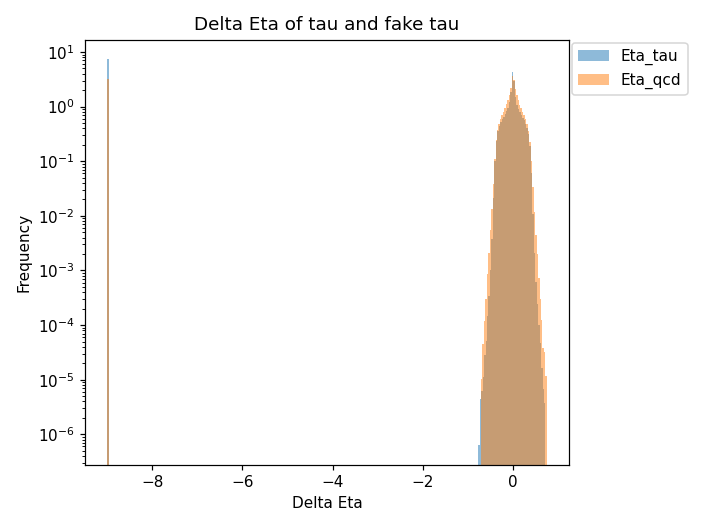

In [22]:
n_bins=300
fig=plt.figure(tight_layout=True)
ax = plt.subplot(1,1,1)
ax1 = plt.subplot(1,1,1) # <- with 2 we tell mpl to make room for an extra subplot
ax.hist(TEta_tau, bins=n_bins , label='Eta_tau', lw=0.5,alpha=0.5, density=True)
ax1.hist(TEta_qcd, bins=n_bins , label='Eta_qcd', lw=0.5,alpha=0.5, density=True)
plt.title("Delta Eta of tau and fake tau")
plt.xlabel('Delta Eta')
plt.ylabel('Frequency')
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.2)
ax.set_yscale('log')
ax1.set_yscale('log')

### Study of Delta Phi

In [23]:
TPhi_tau = array_tau[a,1]
TPhi_qcd = array_qcd[b,1]
print(TPhi_tau.shape)

(49221720,)


In [24]:
TPhi_tau = TPhi_tau[shuffle_indices]

<IPython.core.display.Javascript object>


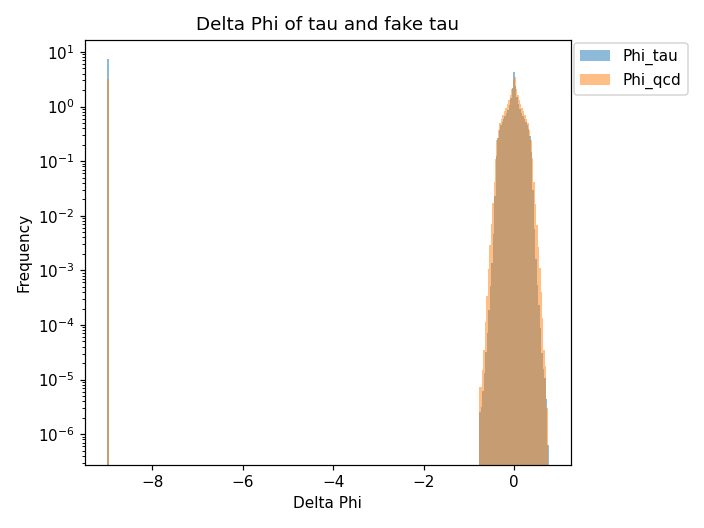

In [25]:
n_bins=300
fig=plt.figure(tight_layout=True)
ax = plt.subplot(1,1,1)
ax1 = plt.subplot(1,1,1) # <- with 2 we tell mpl to make room for an extra subplot
ax.hist(TPhi_tau, bins=n_bins , label='Phi_tau', lw=0.5,alpha=0.5, density=True)
ax1.hist(TPhi_qcd, bins=n_bins , label='Phi_qcd', lw=0.5,alpha=0.5, density=True)
plt.title("Delta Phi of tau and fake tau")
plt.xlabel('Delta Phi')
plt.ylabel('Frequency')
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.2)
ax.set_yscale('log')
ax1.set_yscale('log')

### Study of Energy

In [26]:
print(np.max(array_tau[:,:,2]))
print(np.min(array_tau[:,:,2]))
print(np.max(array_qcd[:,:,2]))
print(np.min(array_qcd[:,:,2]))
print(len(array_tau[:,:,2]))
print(len(array_qcd[:,:,2]))

1000000054099968.0
-999.0
999999919882240.0
-999.0
4922172
2081154


In [27]:
print(array_tau.shape)
c = (array_tau[:,:,2] != -999) & (array_tau[:,:,2] < 10**9)
print(c.shape)
print(array_tau[c,2].shape)

print(array_qcd.shape)
d = (array_qcd[:,:,2] != -999) & (array_qcd[:,:,2] < 10**9)
print(d.shape)
print(array_qcd[d,2].shape)

(4922172, 10, 5)
(4922172, 10)
(37327760,)
(2081154, 10, 5)
(2081154, 10)
(18658999,)


In [28]:
TE_tau = array_tau[c,2]
TE_qcd = array_qcd[d,2]
print(TE_tau.shape)

(37327760,)


In [29]:
shuffle_indices = np.arange( len(TE_tau))
np.random.shuffle(shuffle_indices)
TE_tau = TE_tau[shuffle_indices]

<IPython.core.display.Javascript object>


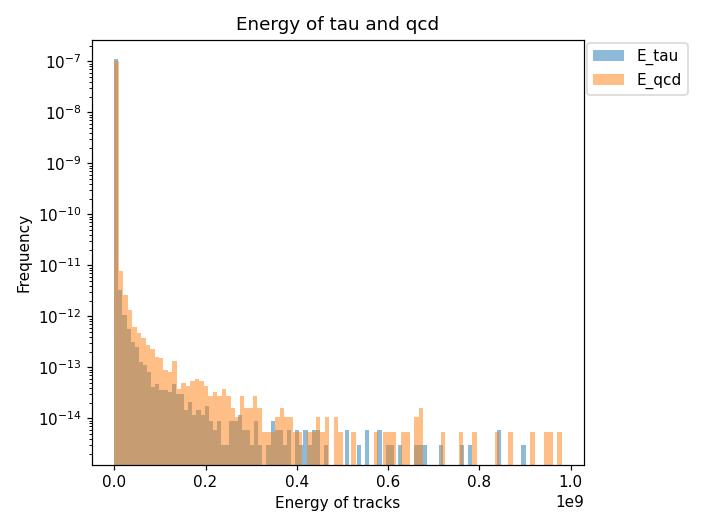

In [36]:
n_bins=100
fig=plt.figure(tight_layout=True)
ax = plt.subplot(1,1,1)
ax1 = plt.subplot(1,1,1) # <- with 2 we tell mpl to make room for an extra subplot
ax.hist(TE_tau, bins=n_bins , label='E_tau', lw=0.5,alpha=0.5, density=True)
ax1.hist(TE_qcd, bins=n_bins , label='E_qcd', lw=0.5,alpha=0.5, density=True)
plt.title("Energy of tau and qcd")
plt.xlabel('Energy of tracks')
plt.ylabel('Frequency')
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.2)
ax.set_yscale('log')
ax1.set_yscale('log')

In [32]:
TPt_tau = array_tau[c,3]
TPt_qcd = array_qcd[d,3]
print(TPt_tau.shape)

(37327760,)


In [33]:
TPt_tau = TPt_tau[shuffle_indices]

<IPython.core.display.Javascript object>


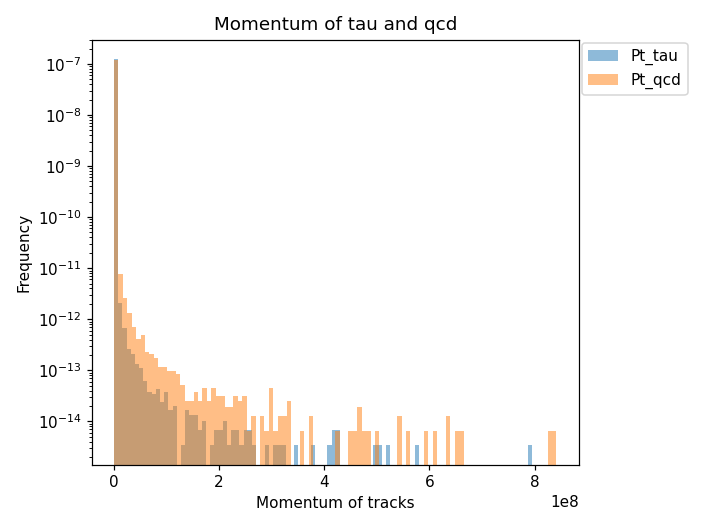

In [35]:
n_bins=100
fig=plt.figure(tight_layout=True)
ax = plt.subplot(1,1,1)
ax1 = plt.subplot(1,1,1) # <- with 2 we tell mpl to make room for an extra subplot
ax.hist(TPt_tau, bins=n_bins , label='Pt_tau', lw=0.5,alpha=0.5, density=True)
ax1.hist(TPt_qcd, bins=n_bins , label='Pt_qcd', lw=0.5,alpha=0.5, density=True)
plt.title("Momentum of tau and qcd")
plt.xlabel('Momentum of tracks')
plt.ylabel('Frequency')
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.2)
ax.set_yscale('log')
ax1.set_yscale('log')

### Start testing DL models

In [261]:
model_1 = tf.keras.models.Sequential(name="model_MLP", layers=[
    tf.keras.Input(shape=(10,4)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="tanh"),
    tf.keras.layers.Dense(64,activation="tanh"),
    tf.keras.layers.Dense(1,activation="softmax")
])

model_1.summary()

Model: "model_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 40)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               5248      
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 65        
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [262]:
opt =tf.keras.optimizers.Adam(learning_rate=0.001)#learning_rate=lr_schedule(0)

model_1.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [264]:
#shuffled_ind, train = shuffle(train)
history = model_1.fit(
    train['features'][:10000,:,:],
    train['label'][:10000],
    batch_size=64,
    epochs=30,
    shuffle=True,
    validation_split = 0.15
)

Epoch 1/30
133/133 [==============================] - 1s 7ms/step - loss: 0.0389 - accuracy: 1.0000 - val_loss: 6.8947 - val_accuracy: 0.0000e+00
Epoch 2/30
133/133 [==============================] - 1s 7ms/step - loss: 8.4841e-04 - accuracy: 1.0000 - val_loss: 7.2178 - val_accuracy: 0.0000e+00
Epoch 3/30
133/133 [==============================] - 1s 7ms/step - loss: 6.5523e-04 - accuracy: 1.0000 - val_loss: 7.6078 - val_accuracy: 0.0000e+00
Epoch 4/30
133/133 [==============================] - 1s 8ms/step - loss: 4.3033e-04 - accuracy: 1.0000 - val_loss: 8.0247 - val_accuracy: 0.0000e+00
Epoch 5/30
133/133 [==============================] - 1s 8ms/step - loss: 3.0920e-04 - accuracy: 1.0000 - val_loss: 8.1410 - val_accuracy: 0.0000e+00
Epoch 6/30
133/133 [==============================] - 1s 8ms/step - loss: 2.7798e-04 - accuracy: 1.0000 - val_loss: 8.2451 - val_accuracy: 0.0000e+00
Epoch 7/30
133/133 [==============================] - 1s 7ms/step - loss: 2.5020e-04 - accuracy: 1.0000 

In [ ]:
model_1.evaluate(test['features'][:1000,:,:], test['label'][:1000], batch_size=128)

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']

mae = history.history['accuracy']
val_mae = history.history['val_accuracy']

epochs_range = range(1, len(loss) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training Accuracy')
plt.plot(epochs_range, val_mae, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Testing the Mask

In [ ]:
train_OT = {}#{'features':[],'label':[] }
e = train['features'][:,9,0] != -999
print(e.shape)

test_OT = {}#{'features':[],'label':[] }
f = test['features'][:,9,0] != -999
print(f.shape)

In [ ]:
train_OT['features'] = train['features'][e,:,:]
train_OT['label'] = train['label'][e]
print(train_OT['label'].shape)
print(train_OT['features'].shape)

test_OT['features'] = test['features'][f,:,:]
test_OT['label'] = test['label'][f]
print(test_OT['label'].shape)
print(test_OT['features'].shape)

In [ ]:
print(len(train_OT))
print(len(test_OT['features']))
print(len(test_OT['label']))
print(type(train_OT['features']))
print(type(train_OT['label']))
print(type(test_OT['features']))
print(type(test_OT['label']))

In [ ]:
model_1 = tf.keras.models.Sequential(name="model_MLP", layers=[
    tf.keras.Input(shape=(10,4)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="tanh"),
    tf.keras.layers.Dense(64,activation="tanh"),
    tf.keras.layers.Dense(1,activation="softmax")
])

model_1.summary()

opt =tf.keras.optimizers.Adam(learning_rate=0.001)#learning_rate=lr_schedule(0)

model_1.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model_1.fit(
    train_OT['features'],
    train_OT['label'],
    batch_size=64,
    epochs=30,
    shuffle=True,
    validation_data=(test_OT['features'], test_OT['label'])
) #validation_split = 0.15

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']

mae = history.history['accuracy']
val_mae = history.history['val_accuracy']

epochs_range = range(1, len(loss) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training Accuracy')
plt.plot(epochs_range, val_mae, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# funzioni per dataugmentation (random traslation, rotations, jitter delle pointlcoud)
def translate_pointcloud(pointcloud):
    xyz1 = np.random.uniform(low=2./3., high=3./2., size=[3])
    xyz2 = np.random.uniform(low=-0.2, high=0.2, size=[3])
       
    translated_pointcloud = np.add(np.multiply(pointcloud, xyz1), xyz2).astype('float32')
    return translated_pointcloud

def rotate_pointcloud(pointcloud):
    theta = np.pi*2 * np.random.uniform()
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    pointcloud[:,[0,2]] = pointcloud[:,[0,2]].dot(rotation_matrix) # random rotation (x,z)
    return pointcloud

def jitter_pointcloud(pointcloud, sigma=0.01, clip=0.02):
    N, C = pointcloud.shape
    pointcloud += np.clip(sigma * np.random.randn(N, C), -1*clip, clip)
    return pointcloud

In [ ]:
def batch_distance_matrix_general(A, B):
    with tf.name_scope('dmat'):#It gives a name_scope at submitted operators, so 'r_A', when executed, will have name 'dmat/r_A'
        r_A = tf.reduce_sum(A * A, axis=2, keepdims=True)
        r_B = tf.reduce_sum(B * B, axis=2, keepdims=True)
        m = tf.matmul(A, tf.transpose(B, perm=(0, 2, 1)))
        D = r_A - 2 * m + tf.transpose(r_B, perm=(0, 2, 1))#'Distance' between A and B
        return D
    
def knn(num_points, k, topk_indices, features): #k-nearest-neighbours
    # topk_indices: (N, P, K)
    # features: (N, P, C)
    with tf.name_scope('knn'):
        queries_shape = tf.shape(features)
        batch_size = queries_shape[0]
        batch_indices = tf.tile(tf.reshape(tf.range(batch_size), (-1, 1, 1, 1)), (1, num_points, k, 1))
        indices = tf.concat([batch_indices, tf.expand_dims(topk_indices, axis=3)], axis=3)  # (N, P, K, 2)
        return tf.gather_nd(features, indices)

def edge_conv(points, features, num_points, K, channels, with_bn=True, activation='relu', pooling='max', name='edgeconv'):
    """EdgeConv
    Args:
    K: int, number of neighbors
    in_channels: # of input channels
    channels: tuple of output channels
    pooling: pooling method ('max' or 'average')
    Inputs:
    points: (N, P, C_p)
    features: (N, P, C_0)
    Returns:
    transformed points: (N, P, C_out), C_out = channels[-1]
    """

    with tf.name_scope('edgeconv'):

        # distance
        D = batch_distance_matrix_general(points, points)  # (N, P, P)
        _, indices = tf.nn.top_k(-D, k=K + 1)  # (N, P, K+1)  Becouse top_k returns the largest, using -D we get the smallest values
        indices = indices[:, :, 1:]  # (N, P, K)

        fts = features
        knn_fts = knn(num_points, K, indices, fts)  # (N, P, K, C)
        knn_fts_center = tf.tile(tf.expand_dims(fts, axis=2), (1, 1, K, 1))  # (N, P, K, C)
        knn_fts = tf.concat([knn_fts_center, tf.subtract(knn_fts, knn_fts_center)], axis=-1)  # (N, P, K, 2*C)

        x = knn_fts
        for idx, channel in enumerate(channels):
            x = keras.layers.Conv2D(channel, kernel_size=(1, 1), strides=1, data_format='channels_last',
                                    use_bias=False if with_bn else True, kernel_initializer='glorot_normal', name='%s_conv%d' % (name, idx))(x)
            if with_bn:
                x = keras.layers.BatchNormalization(name='%s_bn%d' % (name, idx))(x)
            if activation:
                x = keras.layers.Activation(activation, name='%s_act%d' % (name, idx))(x)

        if pooling == 'max':
            fts = tf.reduce_max(x, axis=2)  # (N, P, C')
        else:
            fts = tf.reduce_mean(x, axis=2)  # (N, P, C')

        # shortcut
        sc = keras.layers.Conv2D(channels[-1], kernel_size=(1, 1), strides=1, data_format='channels_last',
                                 use_bias=False if with_bn else True, kernel_initializer='glorot_normal', name='%s_sc_conv' % name)(tf.expand_dims(features, axis=2))
        if with_bn:
            sc = keras.layers.BatchNormalization(name='%s_sc_bn' % name)(sc)
        sc = tf.squeeze(sc, axis=2)

        if activation:
            return keras.layers.Activation(activation, name='%s_sc_act' % name)(sc + fts)  # (N, P, C')
        else:
            return sc + fts

In [ ]:
class _DotDict:
    pass

num_classes = 40
input_shapes = {k:train[k].shape[1:] for k in train.X}

setting = _DotDict()
setting.num_class = num_classes
# conv_params: list of tuple in the format (K, (C1, C2, C3))
setting.conv_params = [
    (20, (64, 64, 64)),
    (20, (64, 64, 64)),
    (20, (128, 128, 128)),
    (20, (256, 256, 256)),
    ]
# conv_pooling: 'average' or 'max'
setting.conv_pooling = 'average'
# fc_params: list of tuples in the format (C, drop_rate)
setting.fc_params = [
    (512, 0.5),
    (256, 0.5),
    ]
setting.num_points = input_shapes['points'][0]

print(input_shapes)
print(setting)

In [ ]:
points = keras.Input(name='points', shape=input_shapes['points'])
features = keras.Input(name='features', shape=input_shapes['features']) if 'features' in input_shapes else None
mask = keras.Input(name='mask', shape=input_shapes['mask']) if 'mask' in input_shapes else None

In [ ]:
name='DGCNN_SG'
fts = tf.squeeze( keras.layers.BatchNormalization(name='%s_fts_bn' % name)(tf.expand_dims(features, axis=2)) , axis=2)

In [ ]:
if mask is not None:
    mask = tf.cast(tf.not_equal(mask, 0), dtype='float32')  # 1 if valid
    coord_shift = tf.multiply(999., tf.cast(tf.equal(mask, 0), dtype='float32'))  # make non-valid positions to 99 

In [ ]:
for layer_idx, layer_param in enumerate(setting.conv_params):# Here creates the 4 edge_conv layers
    K, channels = layer_param
    pts = tf.add(coord_shift, points) if layer_idx == 0 else tf.add(coord_shift, fts)
    fts = edge_conv(pts, fts, setting.num_points, K, channels, with_bn=True, activation='relu',
                    pooling=setting.conv_pooling, name='%s_%s%d' % (name, 'EdgeConv', layer_idx))

In [ ]:
if mask is not None:
    fts = tf.multiply(fts, mask)

pool = tf.reduce_mean(fts, axis=1)  # (N, C)

if setting.fc_params is not None:
    x = pool
    for layer_idx, layer_param in enumerate(setting.fc_params):
        units, drop_rate = layer_param
        x = keras.layers.Dense(units, activation='relu')(x)
        if drop_rate is not None and drop_rate > 0:
            x = keras.layers.Dropout(drop_rate)(x)
    out = keras.layers.Dense(setting.num_class, activation='softmax')(x)

In [11]:
import numpy as np
Dict = {}

In [12]:
array1 = np.array([[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]],[[1,2,3,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]],[[2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2],[2,2,2,2]]])
array1.shape

(3, 10, 4)

In [13]:
array2 = np.array([[9,9,9,9,9,9,9,9,9],[8,8,8,8,8,8,8,8,8],[7,7,7,7,7,7,7,7,7]])
array2.shape

(3, 9)

In [18]:
def shuffle(dict_data, seed=None):
    if seed is not None:
        np.random.seed(seed)
    shuffle_indices = np.arange( len(dict_data['fts']))#Len data.points has to be the same for data.features and data.label
    np.random.shuffle(shuffle_indices)
    for k in dict_data:
        dict_data[k] = dict_data[k][shuffle_indices]
    return shuffle_indices, dict_data

In [19]:
Dict['fts'] = array1
Dict['Glob_fts'] = array2

In [23]:
shuffle_indices, Dict = shuffle(Dict)
Dict

{'fts': array([[[1, 2, 3, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],
 
        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]]),
 'Glob_fts': array([[8, 8, 8, 8, 8, 8, 8, 8, 8],
        [7, 7, 7, 7, 7, 7, 7, 7, 7],
        [9, 9, 9, 9, 9, 9, 9, 9, 9]])}